In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import KNNImputer

import matplotlib
import matplotlib.pyplot as plt

**Attribute Information:**

- Loan_ID: Identifier
- Gender: Male, Female
- Married: No, Yes
- Dependents: 0, 1, 2, 3+
- Education: Graduate, Not Graduate
- Self_Employed: No, Yes
- ApplicantIncome: continuous
- CoapplicantIncome: continuous
- LoanAmount: continuous
- Loan_Amount_Term: continuous
- Credit_History: 1, 0
- Property_Area: Urban, Rural, Semiurban
- Loan_Status: Y, N

In [2]:
df = pd.read_csv('train.csv')
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_t = pd.read_csv('test.csv')
df_t = df_t.drop('Loan_ID', axis=1)
df_t.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


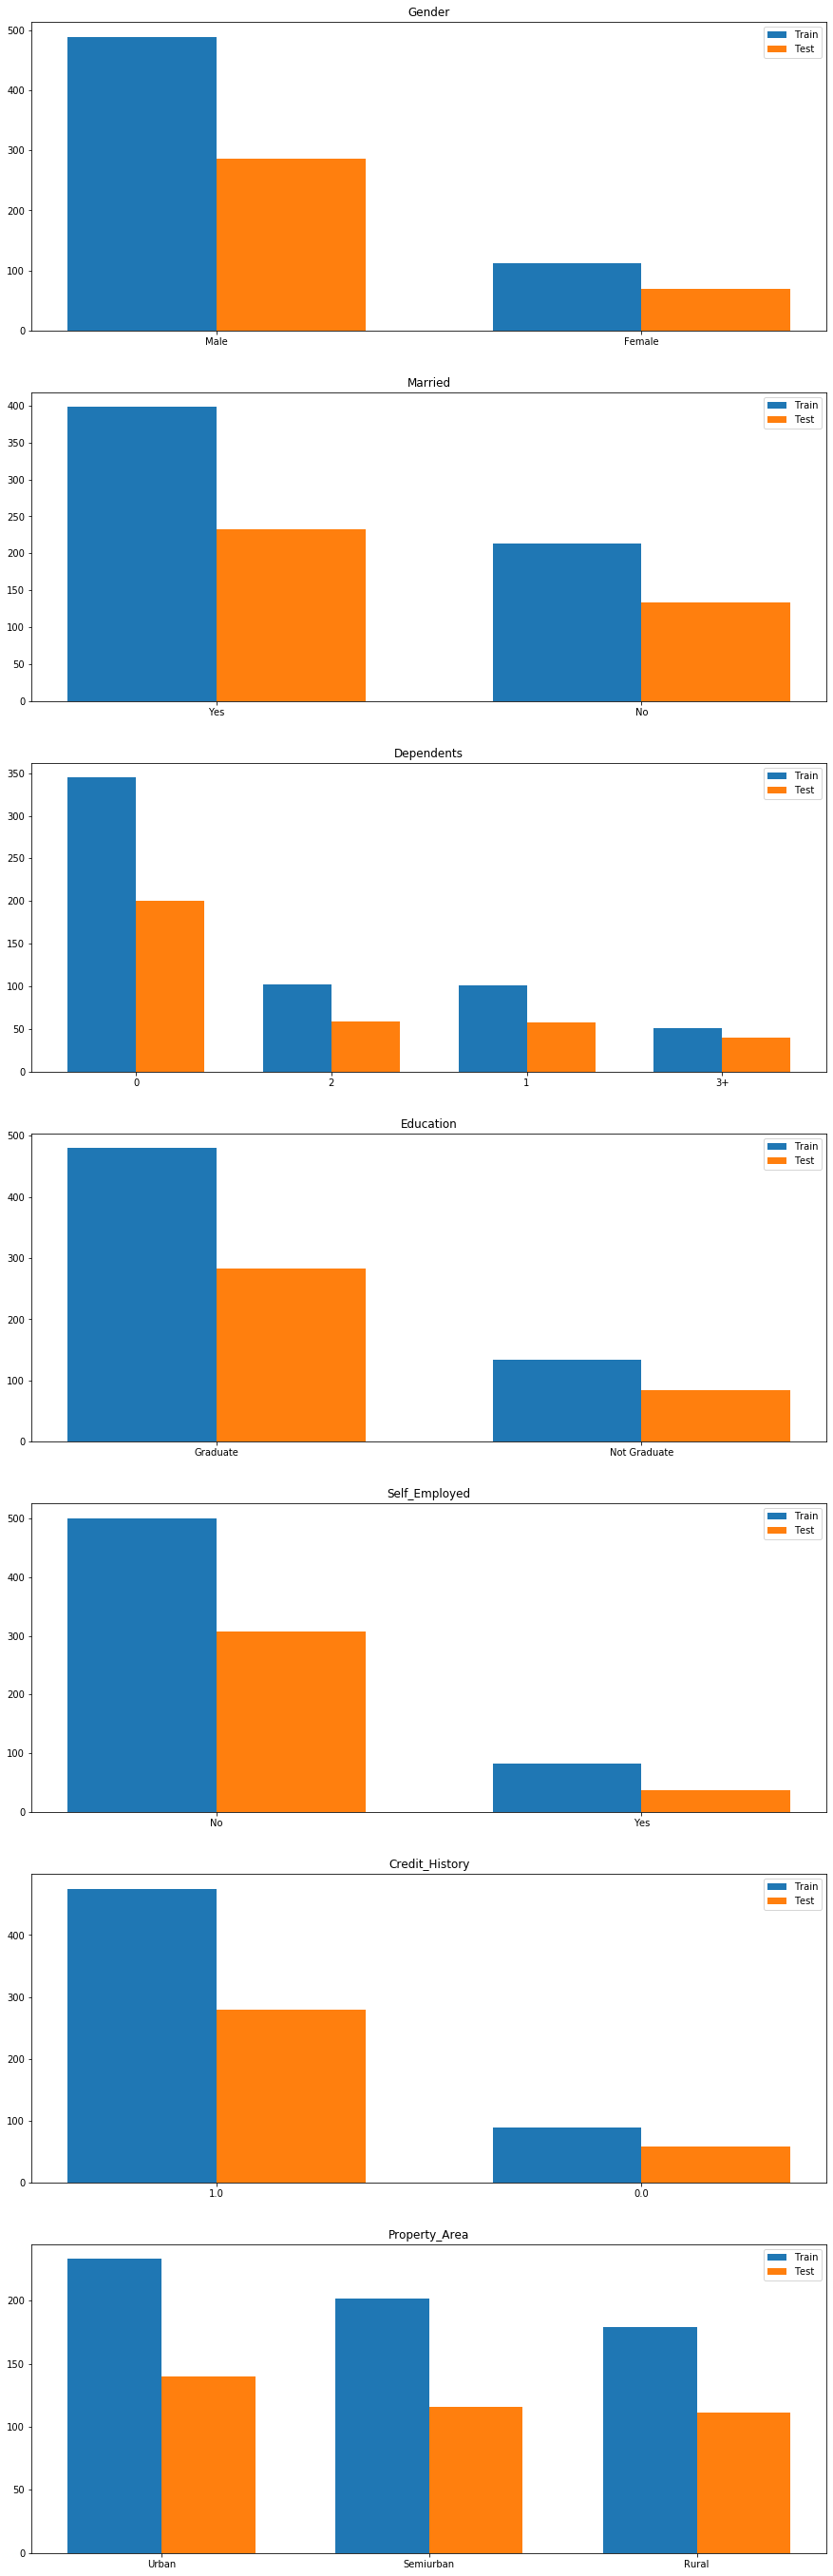

In [4]:
columns = df_t.columns[[0, 1, 2, 3, 4, 9, 10]]

fig, axs = plt.subplots(columns.shape[0], figsize=(15, 7 * columns.shape[0]))

for idx, column in enumerate(columns):
    
    #assert np.any(df[column].value_counts().keys().values, df_t[column].value_counts().keys().values)
    
    labels = df_t[column].value_counts().keys().values
    train_values = df[column].value_counts().values
    test_values = df_t[column].value_counts().values
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    axs[idx].bar(x - width/2, train_values, width, label='Train')
    axs[idx].bar(x + width/2, test_values, width, label='Test')
    axs[idx].set_title(column)
    axs[idx].set_xticks(x)
    axs[idx].set_xticklabels(labels)
    axs[idx].legend()

In [5]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Split train / validation

In [6]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)

In [7]:
for train_index, test_index in sss.split(df.drop('Loan_Status', axis=1), df['Loan_Status']):
    train_df = df.iloc[train_index]
    dev_df = df.iloc[test_index]

In [8]:
train_df.isna().sum()

Gender                8
Married               3
Dependents           13
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      4
Credit_History       33
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
dev_df.isna().sum()

Gender                5
Married               0
Dependents            2
Education             0
Self_Employed        11
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            6
Loan_Amount_Term     10
Credit_History       17
Property_Area         0
Loan_Status           0
dtype: int64

## Encoding categorical

In [10]:
cleanup_data = {'Gender': {'Male': 10, 'Female': 11},
                'Married': {'No': 20, 'Yes': 21},
                'Dependents': {'0': 30, '1': 31, '2': 32, '3+': 33 },
                'Education': {'Graduate': 40, 'Not Graduate': 41},
                'Self_Employed': {'No': 50, 'Yes': 51},
                'Credit_History': {0: 60, 1: 61},
                'Property_Area': {'Urban': 70, 'Rural': 71, 'Semiurban': 72},
                'Loan_Status': {'Y': 1, 'N': -1}
               }

In [11]:
train_df = train_df.replace(cleanup_data)
dev_df = dev_df.replace(cleanup_data)

## Fill missing values

In [12]:
header_list = df.columns

In [13]:
imputer = KNNImputer(n_neighbors=3)
imputer.fit(train_df)

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=3, weights='uniform')

In [14]:
train_df = pd.DataFrame(imputer.transform(train_df), columns=header_list)
dev_df = pd.DataFrame(imputer.transform(dev_df), columns=header_list)

In [15]:
dev_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,10.0,21.0,30.0,40.0,50.0,1025.0,2773.0,112.0,360.0,61.0,71.0,1.0
1,11.0,21.0,30.0,40.0,50.0,2645.0,3440.0,120.0,360.0,60.0,70.0,-1.0
2,10.0,20.0,30.0,40.0,50.0,3069.0,0.0,71.0,480.0,61.0,70.0,-1.0
3,10.0,21.0,31.0,40.0,50.0,3400.0,2500.0,173.0,360.0,61.0,72.0,1.0
4,11.0,21.0,30.0,40.0,50.0,2929.0,2333.0,139.0,360.0,61.0,72.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
180,10.0,20.0,30.0,40.0,50.0,4191.0,0.0,120.0,360.0,61.0,71.0,1.0
181,10.0,21.0,31.0,40.0,51.0,1000.0,3022.0,110.0,360.0,61.0,70.0,-1.0
182,10.0,20.0,30.0,40.0,50.0,3158.0,3053.0,89.0,360.0,61.0,71.0,1.0
183,10.0,21.0,30.0,40.0,50.0,6133.0,3906.0,324.0,360.0,61.0,70.0,1.0


In [16]:
round_list = list(cleanup_data.keys())

train_df[round_list] = train_df[round_list].round(0)
dev_df[round_list] = dev_df[round_list].round(0)

In [17]:
train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
dev_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Save data

In [19]:
inv_cleanup_data = {'Gender': {10: 'Male', 11: 'Female'},
                'Married': {20: 'No', 21: 'Yes'},
                'Dependents': {30: '0', 31: '1', 32: '2', 33: '3+'},
                'Education': {40: 'Graduate', 41: 'Not Graduate'},
                'Self_Employed': {50: 'No', 51: 'Yes'},
                'Credit_History': {60: 0, 61: 1},
                'Property_Area': {70: 'Urban', 71: 'Rural', 72: 'Semiurban'},
               }

In [20]:
train_df = train_df.replace(inv_cleanup_data)
dev_df = dev_df.replace(inv_cleanup_data)

In [21]:
train_df.to_csv('n_train.csv', index=False)
dev_df.to_csv('n_dev.csv', index=False)